# Convolutional Neural Networks:

*Perla B. Mendoza S. & Paul Barde*

**<font color='red'>Purpose:</font>** The main purpose of this notebook is to understand which pixels influence the decision of a Convolutional Neural Network. 

**<font color='red'>At the end of this session:</font>** You should be able to...

- Understand what is the difference between a neural network and a convolutional neural network. 
    - **Convolutional Layer, Pooling Layer, Local connectivity, Spatial Arrangement. **
- Discover the VGG-16 trained neural network, really useful to start practicing with. 
- Feel comfortable with KERAS modules for visualizing Convolutional Neural Networks. 
    - **Activation, Maximum Activation, Saliency, Grad-Cam**


## Before starting
We will be using the **keras-vis package** : https://github.com/raghakot/keras-vis so you need to install some packages and fancy stuffs. If you are on linux and you have Anaconda installed you can just run the following lines in the terminal. It will create a new conda environment and install what is requiered. 

conda create --name convNet

source activate convNet

conda install pip

conda install jupyter

conda install tensorflow

conda install keras

pip install keras-vis

jupyter notebook

##### Then, when you are finished playing you can just remove the conda environment with the line : 

source deactivate

conda remove --name convNet --all

## Differences between Neural Networks and Convolutional Neural Networks

#### <font color='green'>ConvNet architectures make the explicit assumption that the inputs are images, which allow us to encode certain properties into the architecture</font>.

As a consequence, the forward function which links the layers among them, to the input and to the output, is <font color='green'>**more efficient to implement**</font> and <font color='green'>**vastly reduce the amount of parameters**</font> in the network. 

![title](images/intro.PNG)

In this image, to the left we have a normal neural network and to the right a convolutional neural network. Conv Neural Networks take advantage of the fact that the input consists of images, creating 3D layers arranged in 3 dimensions: width, height and depth. The depth corresponds to the third dimension of an activation module. 
The neurons in a layer will only be connected to a small region of the layer before it, instead of all the neurons in a fully-connected manner. 

## Layers used to build convolutional networks

There are three types of layers used to build convolutional networks: the <font color='green'> **convolutional layers**</font> (CONV), the **<font color='green'>pooling layers</font>** (POOL) and the <font color='green'>**fully-connected layers**</font> (FC). 

*In this document, we explain mainly the convolutional layers principle. Pooling and fully-connected layers are also introduced but for further information we invite you to consult the **Annex** section.* 

### Convolutional Layer

The convolutional layer is composed of several small filters (ie. 5x5x3 for 5 pixels width and height, and 3 corresponding to the depth, color channels). During the forward pass, we *convolve* each filter across the width and height of the input volume to produce *dot products* (2D activation map) between the entries of the filter and the input at any position. The  <font color='blue'>**network will learn the filters that activate when they see some type of visual feature**</font> (ie. mark of some color on the first layer). Now, for each CONV layer we will have a set of filters, each of them producing a respective  <font color='blue'>**activation map**</font> which will be arranged along the depth dimension to obtain the output volume. 

*Syllabus:*

to convolve: convoluer; dot product: produit scalaire; 

**Hyperparamaters:**
- **Local Connectivity**. We connect each neuron only to a specific region of the input volume. The spatial extent of this connectivity is controlled by the <font color='blue'>**receptive field**</font> parameter. Connections are local in space (along width and height), but **always** full along the entire depth of the input volume. 

![title](images/hello.PNG)

- **Spatial arrangement**. Three hyperparameters control the size of the output volume: the <font color='blue'>**depth**</font> (number of filters we would like to use), <font color='blue'>**stride**</font> (we move the filters one pixel at a time or two pixels at a time) and <font color='blue'>**zero-padding**</font> (we pad the input volume border with zeros). 

*Syllabus:*

stride: le pas, zero-padding: remplissage avec des zéros. 

**Estimation of the ouput volume**

- Input Volume Size W
- Receptive Field Size of the Conv Layer neurons F
- Stride S
- Amount of zero-padding used P

__$$Output = (W-F +2P)/S +1)$$__


### Pooling Layer 

The pooling layer is commonly inserted periodically in-between successive Conv Layers in a convolutional network architecture. It allows mainly to reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting. 

![title](images/pool.png)

### Fully-connected layer

Neurons in a fully-connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. 

![title](images/keras-logo.png)

## <font color='purple'>Let's play!</font>
### Visualizing CNN (VGG-16) with Keras

Keras offers a high-level visualization and debugging toolkit for your trained neural network models.

It is important to recall that neural networks can be pictured as <font color='purple'>**black boxes**</font>. In order to <font color='purple'>**understand**</font> how convolutional neural networks work, to <font color='purple'>**identify**</font> which <font color='purple'>**parameters**</font> may lead to <font color='purple'>**misclassify an image**</font> and to <font color='purple'>**evaluate**</font> whether the network is <font color='purple'>**over/under fitting**</font>, visualizing tools can be incredibly useful!!  

![title](images/blackbox.png)

Currently supported visualizations include: 

- Activation Maximization
- Saliency maps
- Class activation maps



We'll be using the trained **VGGNet16 Convolutional Neural Network. VGG16 (also called OxfordNet)** is a convolutional neural network architecture named after the Visual Geometry Group (http://www.robots.ox.ac.uk/~vgg/) from Oxford, who developed it. It was used to win the ILSVR (ImageNet) competition in 2014 (http://www.robots.ox.ac.uk/~vgg/research/very_deep/). You'll see that it actually gets quite a lot of wrong answer but it is still worth visualize how it makes its decisions. 

In [1]:
# KERAS-VIS module for visualization 
from vis.utils import utils


# Activations are used through an Activation Layer. 
from keras import activations
from keras.applications import VGG16
# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
# Anyway, we are interested in the last layer, where the prediction happens 
layer_idx = utils.find_layer_idx(model, 'predictions')

#To visualize activation over final dense layer outputs, we need to switch the softmax activation out for linear
#since gradient of output node will depend on all the other node activations.
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)


import pickle 
#A dictionary that associates each class to its label
dico=pickle.load(open('./dico.pkl','rb'))

for key in range(10) :
    print( str(key) + ': '+dico[key]+'\n')

Using TensorFlow backend.


0: tench, Tinca tinca

1: goldfish, Carassius auratus

2: great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias

3: tiger shark, Galeocerdo cuvieri

4: hammerhead, hammerhead shark

5: electric ray, crampfish, numbfish, torpedo

6: stingray

7: cock

8: hen

9: ostrich, Struthio camelus



/home/paul/anaconda3/envs/tensorFlow/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


###  Let's take a couple of images and see how the Network classifies them. 

/home/paul/anaconda3/envs/tensorFlow/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


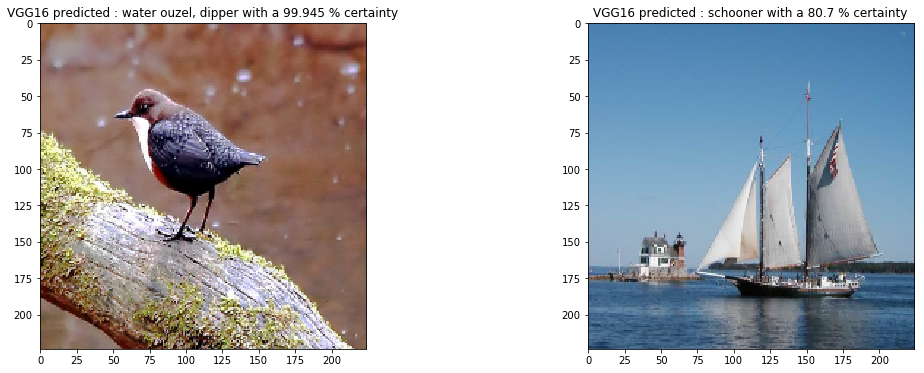

In [6]:
from vis.utils import utils
from matplotlib import pyplot as plt
import numpy as np

# Magic function in IPython:The resulting plots will also be stored in the notebook document. 
%matplotlib inline

# Size of the displaying figures for visualizing plots. 
plt.rcParams['figure.figsize'] = (18, 6)

#We define the softmax function to translate the output of the CNN into a probability for each class. 
def softmax(x):
    """
    Compute softmax values for each sets of scores in x.
    
    Rows are scores for each class. 
    Columns are predictions (samples).
    """
    scoreMatExp = np.exp(np.asarray(x))
    return scoreMatExp / scoreMatExp.sum(0)

#Function that calls the VGG16 network and displays its prediction
def predictImage(imagesPaths):
    images=[]
    outs=[]
    f, ax = plt.subplots(1, len(imagesPaths))
    for i,path in enumerate(imagesPaths) :
        # Image to be predicted
        im=utils.load_img(path, target_size=(224, 224))
        images.append(im)
        
        # Output: prediction value for the input image
        out=softmax(model.predict(im.reshape(-1,224,224,3))[0])
        outs.append(out)
        classKey=np.argmax(out)
        
        # Look in the dictionary for the specific term for the image identification. 
        certainty=out[classKey]
        if len(imagesPaths)>1:
            ax[i].imshow(im)
            ax[i].set_title('VGG16 predicted : ' + dico[classKey] +' with a '+ str(round(certainty*100,3))+' % certainty')
        else :
            ax.imshow(im)
            ax.set_title('VGG16 predicted : ' + dico[classKey] +' with a '+ str(round(certainty*100,3))+' % certainty')
    return images,outs

images,outs = predictImage(['images/ouzel1.jpg','images/boat1.jpg'])


#### That's pretty good right ? Unfortunatly the network is not always right.

/home/paul/anaconda3/envs/tensorFlow/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


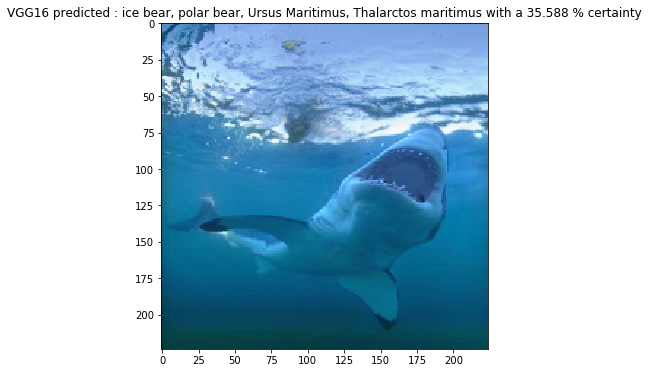

In [7]:
im,out=predictImage(['images/shark1.jpg'])
images = images + im
outs = outs + out

In [8]:
def otherProbs(out):
    sortedIds=np.argsort(-out)
    print('But it could also be : \n')
    for i in range(1,7) : 
        print('A '+dico[sortedIds[i]]+' with a '+ str(round(out[sortedIds[i]]*100,3))+' % certainty')

otherProbs(outs[-1])

But it could also be : 

A bubble with a 12.425 % certainty
A stingray with a 8.048 % certainty
A tub, vat with a 3.115 % certainty
A candle, taper, wax light with a 2.914 % certainty
A conch with a 2.893 % certainty
A toilet tissue, toilet paper, bathroom tissue with a 1.631 % certainty


See ? for this picture the networks belives it to be ice bear. Even worst it finds that it is more similar to a toilet tissue than a shark... This is one of the reason why people might get suspicious about CNN. 

#### Your turn now : 
just download a picture on Google Images for example and feed it to the network to see how it classifies it. (If you want to be sure that what's on your image corresponds to a class known by VGG16 you should look at the pictures hosted here : http://www.image-net.org/index. 

##### For the rest of the notebook to workout you should concatenate the outputs of the function predictImage with the previous output like it as been done for the shark (or polar bear depending on who you're asking)

### Activation maximization

*Access to the full Keras-vis Documentation on Activation maximization:[here](https://raghakot.github.io/keras-vis/visualizations/activation_maximization/)*

Convolutional filters learn 'template matching' filters that maximize the output when a similar template pattern is found in the input image. The corresponding filter is the one that maximizes the activation during the convolution.

#### So let's now see what is the convNet's filters that maximizes the activations for the ouzel ? 
Actually this takes some time, so I suggest you don't run the cell below. 

In [ ]:
from vis.visualization import visualize_activation
from vis.input_modifiers import Jitter


# 20 is the imagenet category for 'ouzel'
im = visualize_activation(model, layer_idx, filter_indices=20, max_iter=500,input_modifiers=[Jitter(16)], verbose=False)
plt.imshow(im)

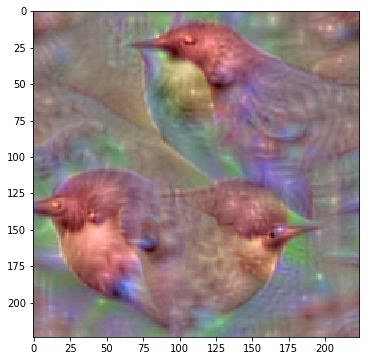

Look at that! Not only has the convNet captured what it means to be an ouzel, but it also seems to encode for different orientations and scales, a further proof of rotational and scale invariance.

#### Why don't you try it for a polar bear ? 
find the imagenet category for polar bear and visualize the corresponding filter. Do you understand now why the network got it wrong with the shark ?
I suggest you run the cell the moment you go on a break :) (Actually it takes approx 20 min so do it only if you have finished every thing else )

### Saliency maps (*fr: saillance/contraste*) 

*Access to the full Keras-vis Documentation on Saliency:[here](https://raghakot.github.io/keras-vis/visualizations/saliency/)*

We compute the gradient of output category with respect to input image. This should tell us how output category value changes with respect to a small change in input image pixels. All the positive values in the gradients tell us that a small change to taht pixel will increase the ouput value. Hence, visualizing these gradients, which are the same shape as the image should provide some intuition of attention. 

#### <font color='purple'>KERAS modules_</font>

- **<font color='purple'>overlay(array1,array2,alpha=0.5)</font>**:
Returns the **array1** overlayed with **array2** using **alpha** blending.

- **<font color='purple'>visualize_saliency(model,layer_idx,filter_indices,seed_input,backdrop_modiifier=None,grad_modifier="absolute")</font>**: Generates an attention heatmap over the **seed_input** for maximing **filter_indices** output in the given **layer_idx**.


*Acces to the full Keras-vis Documentation on visualize_activation_with_losses:[here](https://raghakot.github.io/keras-vis/vis.visualization/#visualize_cam)
*


/home/paul/anaconda3/envs/tensorFlow/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


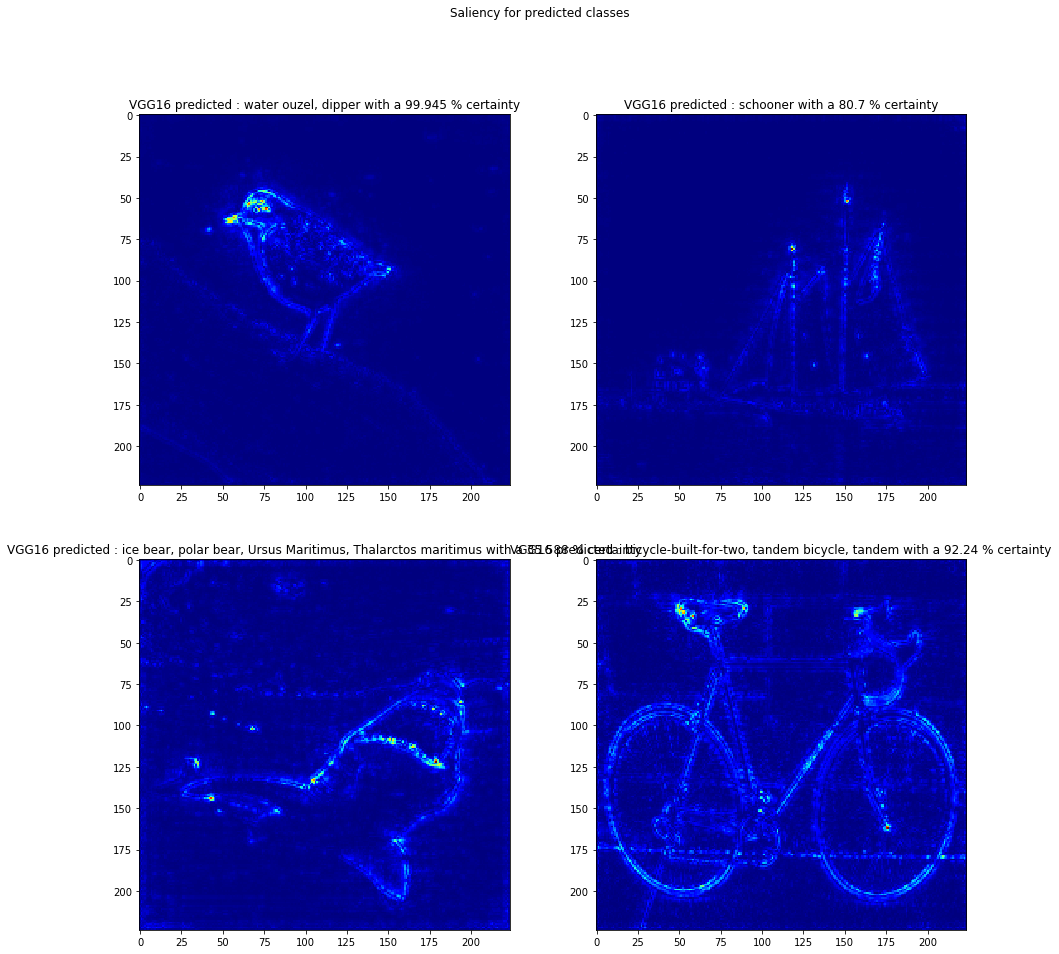

In [8]:
# KERAS visualize_cam
from vis.visualization import visualize_saliency

plt.figure()
f, ax = plt.subplots(2, 2,figsize=(15,15))
ax=ax.reshape((4))
plt.suptitle('Saliency for predicted classes')


# New output containing the output result for the saliency visualization 
gradsSaliency=[]
gradsCAM=[]
certainties=[]
classKeys=[]

for i, img in enumerate(images): 
    classKey=np.argmax(outs[i])
    classKeys.append(classKey)
    certainty=outs[i][classKey]
    certainties.append(certainty)
    
    grads = visualize_saliency(model, layer_idx, filter_indices=classKeys[i], seed_input=img, backprop_modifier='guided')        
    gradsSaliency.append(grads)
    
    ax[i].imshow(grads,cmap='jet')
    ax[i].set_title('VGG16 predicted : ' + dico[classKeys[i]] +' with a '+ str(round(certainties[i]*100,3))+' % certainty')

### Class activation maps

*Access to the full Keras-vis Documentation on Class activation maps:[here](https://raghakot.github.io/keras-vis/visualizations/class_activation_maps/)*

Class activation maps or grad-Cam uses penultimate Convolutional Layer output. The intuition is to use the nearest Convolutional Layer to utilize spatial information that gets completely lost in Dense Layer. 

#### <font color='purple'>KERAS modules_</font>

- **<font color='purple'>overlay(array1,array2,alpha=0.5)</font>**:
Returns the **array1** overlayed with **array2** using **alpha** blending.

- **<font color='purple'>visualize_cam(model,layer_idx,filter_indices,seed_input,penultimate_layer_idx=None,backdrop_modifier=None,grad_modifier="None")</font>**: Generates a gradient based class activation map (grad-CAM) that maximizes the outputs of **filter_indices** in **layer_idx**.

*Acces to the full Keras-vis Documentation on visualize_activation_with_losses:[here](https://raghakot.github.io/keras-vis/vis.visualization/#visualize_cam)

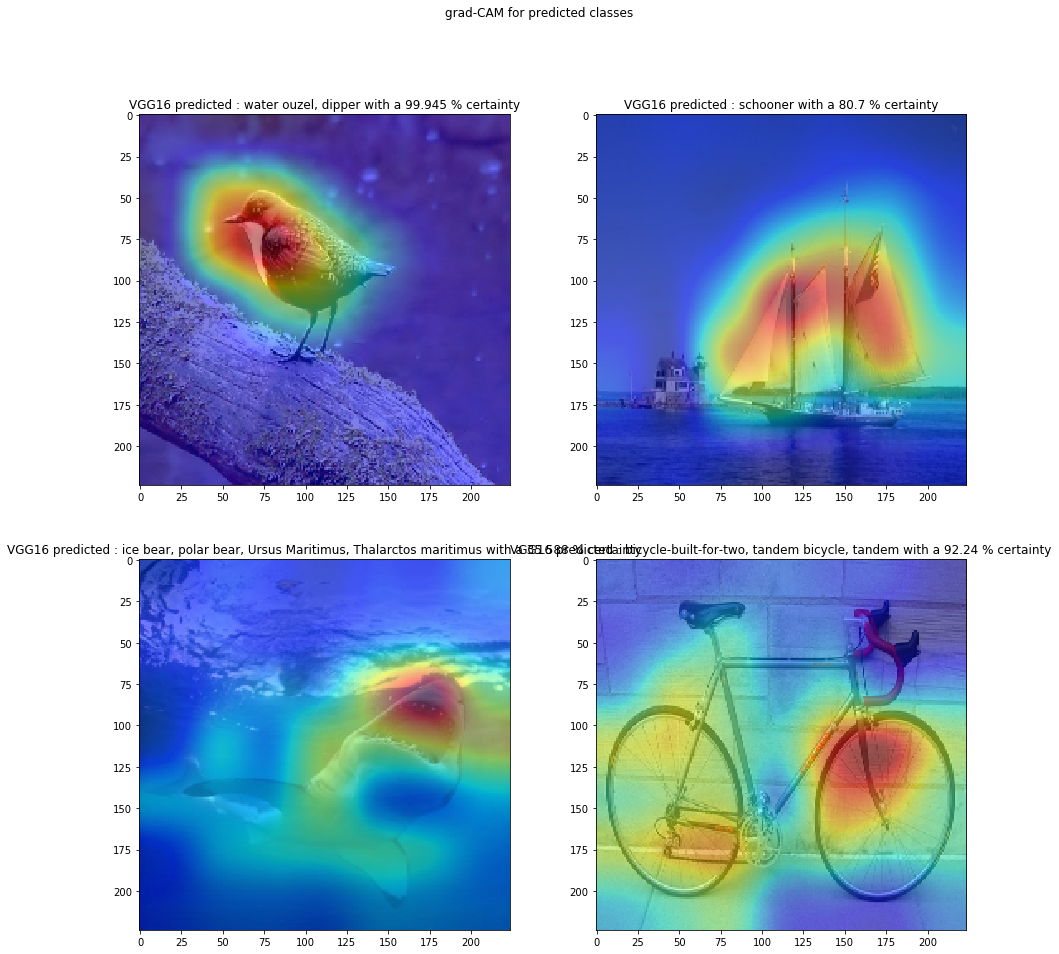

In [10]:
import numpy as np
import matplotlib.cm as cm

# KERAS visualize_cam
from vis.visualization import visualize_cam, overlay 

plt.figure()
f, ax = plt.subplots(2, 2,figsize=(15,15))
ax=ax.reshape((4))

# New list containing the output image result of the Grad-Cam visualization. 
gradsCAM=[]

plt.suptitle('grad-CAM for predicted classes') 


for i, img in enumerate(images):    
    
    # Visualization with the Grad-Cam output. 
    grads = visualize_cam(model, layer_idx, filter_indices=classKeys[i], 
                          seed_input=img, backprop_modifier='guided')        
    # Lets overlay the heatmap onto original image. 
    gradsCAM.append(grads)
    t=plt.imshow(grads,cmap='jet')
    l=t.get_array()
    ax[i].imshow(overlay(l,img))
    ax[i].set_title('VGG16 predicted : ' + dico[classKeys[i]] +' with a '+ str(round(certainties[i]*100,3))+' % certainty')

### Class activation maps (grad-CAM) + saliency visualization 
If we combine the two we get only the edges that where important for the decision. 

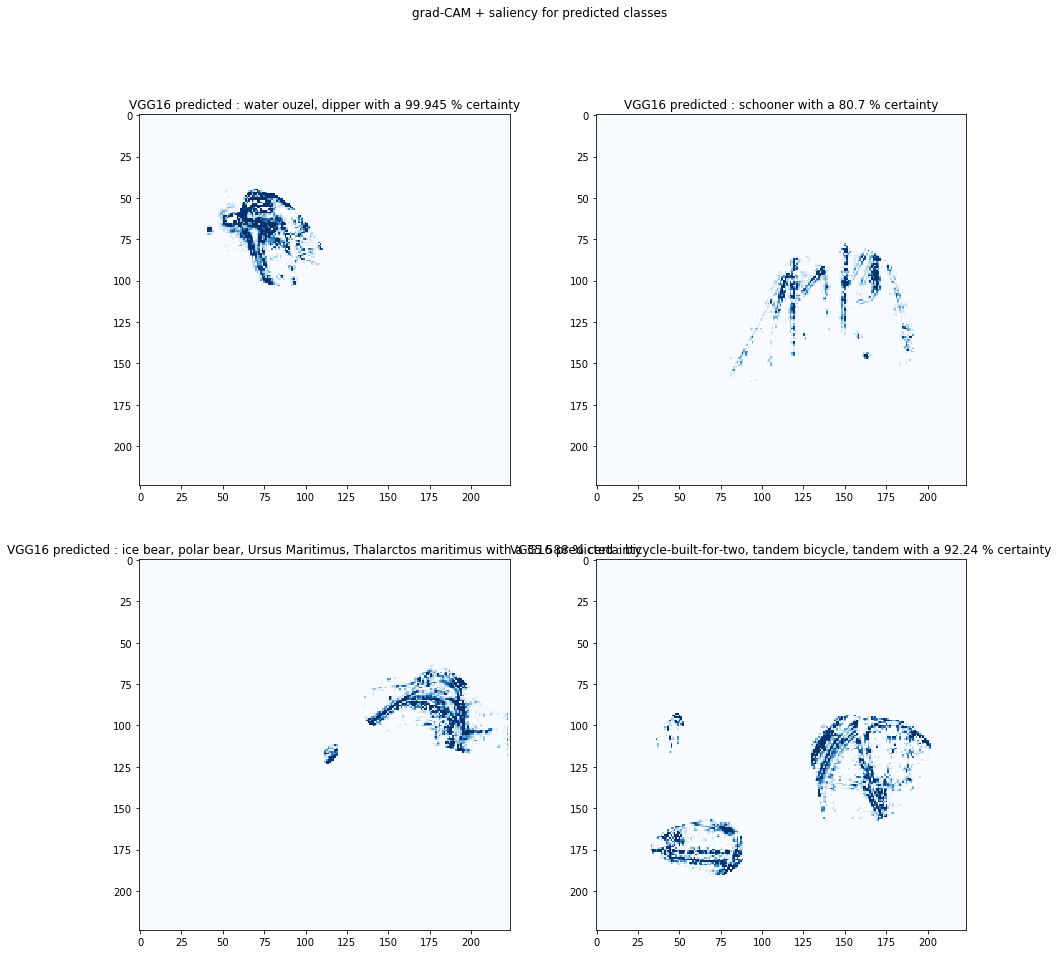

In [11]:
from matplotlib import colors
plt.figure()
f, ax = plt.subplots(2, 2,figsize=(15,15))
ax=ax.reshape((4))
plt.suptitle('grad-CAM + saliency for predicted classes')

for i, img in enumerate(images):    

    ax[i].imshow((gradsSaliency[i][:,:,2]*1/(1.1+gradsCAM[i][:,:,2])),cmap='Blues',vmin=150),
    #ax[i].imshow(overlay(jet_heatmap[:,:,:,1],jet_heatmap[:,:,:,2]))
    ax[i].set_title('VGG16 predicted : ' + dico[classKeys[i]] +' with a '+ str(round(certainties[i]*100,3))+' % certainty')

Now we get only the pixels the network based its decision on. 
Now it's your time to play, what happens if we look at the pixels that made the network think that the shark was in fact a bubble ? 

### Now what happens if we have two labelled things in a same image ?
Download an image with a dog and a cat for example and see the zones of importance depending on which animal you try to indentify. 

### Annex
Keras documentation : https://github.com/fchollet/keras

The Stanford CS class CS231n: http://cs231n.github.io/